In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt


%matplotlib inline

# lnline 실행시켜야 선이 그려짐

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
import matplotlib

matplotlib.rc('axes',unicode_minus=False) 

## 그래프 수치에 마이너스가 나올경우 오류 안나게 방지

- 데이터 빈도(히스토그램,박스)
- 데이터 전처리
- 변수 검토
- 변수간 관계 분석 및 시각화

In [4]:
xls=pd.ExcelFile('./data/koweps_visualization.xlsx')

In [5]:
koweps_df = xls.parse(xls.sheet_names[0])

In [17]:
data_df = koweps_df.copy()
data_df.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


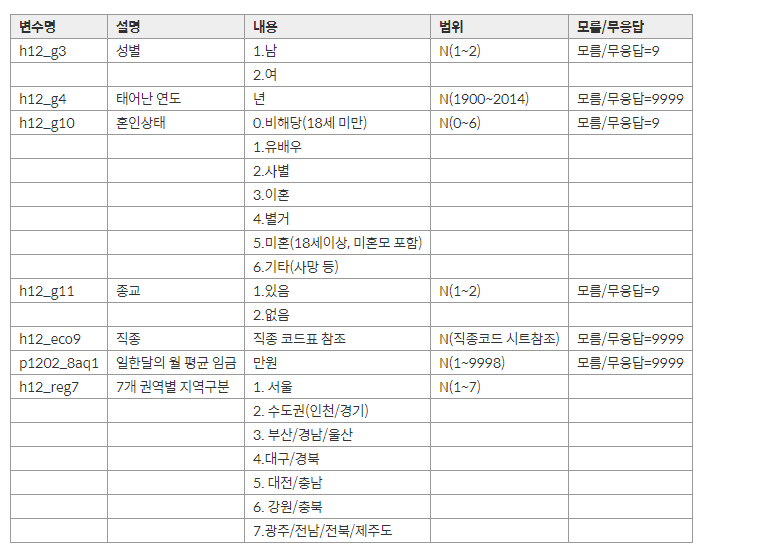

In [15]:
from IPython.display import Image
Image('C://Users///mgk04.DESKTOP-8Q51H2D//data//koweps_img.png')

In [150]:
# 1. 해당 데이터프레임에서 제공해주는 컬럼들만 추출하여 rename
temp_df = data_df[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7']]
temp_df.columns = ['성별', '태어난 연도', '혼인상태', '종교', '직종', '일한달의 월 평균 임금', '7개 권역별 지역구분']
temp_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [19]:
# 성별의 데이터 분포 확인
# 성별을 비율순으로 정렬
# 데이터 시각화

# 성별을 남, 여로 변경
gender_filter_df = temp_df.filter(['성별'])
gender_filter_df['성별2'] = np.where(gender_filter_df['성별'] == 1, '남자', '여자')
display(gender_filter_df.head())
print('*' * 50)


,성별,성별2
0,2,여자
1,2,여자
2,1,남자
3,1,남자
4,2,여자


**************************************************


In [20]:

# 데이터 분포 확인
gender_count = gender_filter_df['성별2'].value_counts()
display(gender_count)
print('*' * 50)


여자    8440
남자    6982
Name: 성별2, dtype: int64

**************************************************


In [21]:
# 시리즈를 데이터프레임으로 변환
gender_count_df = pd.DataFrame(gender_count)
gender_count_df.rename(columns = {'성별2' : '명'}, inplace = True)
display(gender_count_df)
print('*' * 50)

,명
여자,8440
남자,6982


**************************************************


In [22]:

# 비율순으로 정렬
gender_count_df.sort_values('명', inplace = True)
display(gender_count_df)
print('*' * 50)


,명
남자,6982
여자,8440


**************************************************


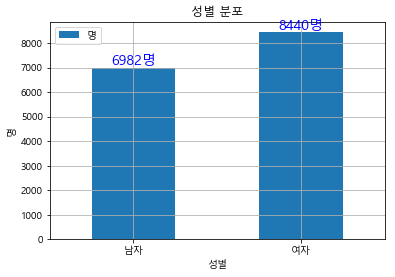

In [29]:
# 시각화
gender_count_df.plot.bar(rot = 0)
plt.grid()
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('명')

for idx, value in enumerate(list(gender_count_df['명'])):
    txt = '%d명' % value
    plt.text(idx,value,txt,
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=14,
            color='blue')


plt.show()

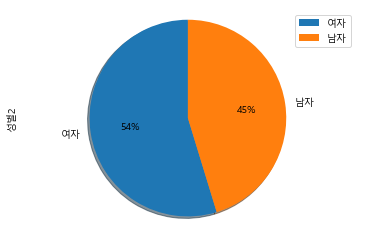

In [30]:
# pie plot
gender_count.plot.pie(autopct= '%d%%', startangle = 90, 
                      legend = True, 
                      labels=gender_count.index,
                      shadow = True)
plt.axis('equal')
plt.show()

# 성별에 따른 평균 급여 차이를 분석

In [132]:
temp_df.head()

,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN


In [80]:
# 성별과 월급 데이터만 추출
gender_sal=temp_df[['성별','일한달의 월 평균 임금']]
gender_sal.head()

,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN


In [192]:
#  성별을 남자와 여자로 변환
gender_sal['성별'] = np.where(gender_sal['성별'] == 1, '남자', '여자')
gender_sal.head()

,성별,일한달의 월 평균 임금
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0


In [81]:
# 데이터 정제(결측값 확인, 결측값제거,이상치 처리)
gender_sal.isna().sum()

성별                  0
일한달의 월 평균 임금    10915
dtype: int64

In [82]:
gender_sal=gender_sal.dropna(axis=0)

In [83]:
gender_sal.isna().sum()
gender_sal['일한달의 월 평균 임금']

3        108.9
10        20.0
16       322.0
17       120.0
24       300.0
27       100.0
29       200.0
30       130.0
31       150.0
36       250.0
43       467.0
46       177.0
47       237.0
52       245.0
53       200.0
58       222.0
61       190.0
66       232.0
69       219.0
75       200.0
76       841.0
80       691.0
84       240.0
89       177.0
92       197.0
93       190.0
95       184.0
96       227.0
97        64.0
99       214.0
         ...  
15304     88.0
15305    236.0
15306    210.0
15309    428.0
15317    183.0
15325     97.0
15327    289.0
15332    130.0
15333     97.0
15334    361.0
15337    231.0
15348    203.0
15353    313.0
15357    246.0
15358    120.0
15361    483.0
15362     76.0
15365    181.0
15372    126.0
15373    587.0
15376    180.0
15377     80.0
15378    704.0
15387    350.0
15388    250.0
15400    230.0
15401    138.0
15404    286.0
15412    179.0
15419     72.0
Name: 일한달의 월 평균 임금, Length: 4507, dtype: float64

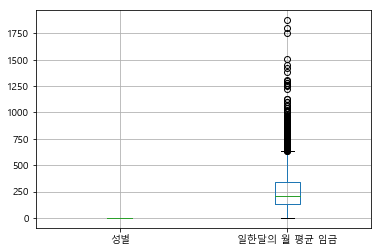

In [84]:
gender_sal.boxplot()

In [85]:
# 3사분위 정보
quantile75=gender_sal.quantile(q=0.75)
quantile75

성별                2.0
일한달의 월 평균 임금    336.0
Name: 0.75, dtype: float64

In [86]:
# 1사분위 정보를 얻어본다면?
quantile25=gender_sal.quantile(q=0.25)
quantile25

성별                1.0
일한달의 월 평균 임금    135.0
Name: 0.25, dtype: float64

In [87]:
# IQR(3사분위수 - 1사분위수의 차)
iqr=quantile75-quantile25
iqr

성별                1.0
일한달의 월 평균 임금    201.0
dtype: float64

In [88]:
# 최저 한계치(lower fence)
lower_fence=quantile25-1.5*iqr
print(lower_fence)
# 최고 한계치(upper fence)
upper_fence=quantile75+1.5*iqr
print(upper_fence)

성별               -0.5
일한달의 월 평균 임금   -166.5
dtype: float64
성별                3.5
일한달의 월 평균 임금    637.5
dtype: float64


In [190]:
# 극단치 경계값을 얻어보자(아래수평선)
lower_outiler=gender_sal[gender_sal>lower_fence].min()
print(lower_outiler)
# 극단치 경계값을 얻어보자(위수평선)
upper_outlier=gender_sal[gender_sal<upper_fence].max()
print(upper_outlier)

성별              1.0
일한달의 월 평균 임금    0.0
dtype: float64
성별                2.0
일한달의 월 평균 임금    634.0
dtype: float64


In [110]:
# 일한달의 월 평균 임금 이상치 데이터 추출
#money_df=gender_sal.query('일한달의 월 평균 임금>'+str(upper_outlier['일한달의 월 평균 임금']))
#money_df

money_df=gender_sal[['일한달의 월 평균 임금']]>upper_outlier['일한달의 월 평균 임금']
money_df[gender_sal[['일한달의 월 평균 임금']]>upper_outlier['일한달의 월 평균 임금']]
# money_df[money_df['일한달의 월 평균 임금']==True]
money_df

,일한달의 월 평균 임금
3,False
10,False
16,False
17,False
24,False
27,False
29,False
30,False
31,False
36,False


In [146]:
money_df=gender_sal[gender_sal['일한달의 월 평균 임금'] >upper_outlier['일한달의 월 평균 임금']]
money_df.count()

성별              207
일한달의 월 평균 임금    207
dtype: int64

In [144]:
# 일한달의 월 평균 임금에 대한 이상치를 결측값으로 변경
for idx in money_df.index:
    #print(idx)
    gender_sal.loc[idx,'일한달의 월 평균 임금']==np.nan
gender_sal

,성별,일한달의 월 평균 임금
3,1,108.9
10,2,20.0
16,1,322.0
17,2,120.0
24,1,300.0
27,2,100.0
29,2,200.0
30,2,130.0
31,2,150.0
36,1,250.0


In [145]:
gender_sal.isna().sum()

성별              0
일한달의 월 평균 임금    0
dtype: int64

In [142]:
gender_sal.filter(['일한달의 월 평균 임금']).isna().sum()

일한달의 월 평균 임금    0
dtype: int64

In [129]:
# 결측값을 제거한 성별로 그룹화하여 그룹별 평균
gender_sal.head()

,성별,일한달의 월 평균 임금
3,1,108.9
10,2,20.0
16,1,322.0
17,2,120.0
24,1,300.0


In [130]:
gen_sal_df=gender_sal.groupby('성별')[['일한달의 월 평균 임금']].mean()
gen_sal_df

,일한달의 월 평균 임금
성별,
1,333.280785
2,175.293108


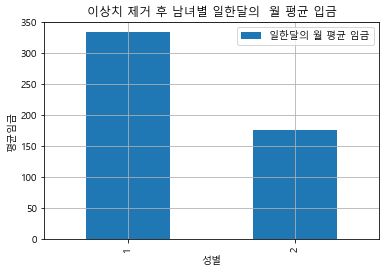

In [131]:
gen_sal_df.plot.bar()
plt.grid()
plt.title('이상치 제거 후 남녀별 일한달의  월 평균 입금')
plt.xlabel('성별')
plt.ylabel('평균임금')
plt.show()

# 나이에 따른 평균 급여 변화

In [148]:
- 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거,이상치 결측 처리)
- 데이터 분석(나이에 따른 급여평균)
- 데이터 시각화

SyntaxError: invalid syntax (<ipython-input-148-406766d8dabe>, line 1)

- 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)

In [163]:
temp_df['나이']=2020-temp_df['태어난 연도']+1

C:\Users\mgk04.DESKTOP-8Q51H2D\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
temp_df.head(4)

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,age,나이
0,2,1936,2,2,NaN,NaN,1,85,85
1,2,1945,2,2,NaN,NaN,1,76,76
2,1,1948,2,2,NaN,NaN,1,73,73
3,1,1942,3,1,762.0,108.9,1,79,79


In [186]:
temp_df['age_group']=temp_df['나이']//10*10

C:\Users\mgk04.DESKTOP-8Q51H2D\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [187]:
temp_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,age,나이,age_group
0,2,1936,2,2,NaN,NaN,1,85,85,80
1,2,1945,2,2,NaN,NaN,1,76,76,70
2,1,1948,2,2,NaN,NaN,1,73,73,70
3,1,1942,3,1,762.0,108.9,1,79,79,70
4,2,1923,2,1,NaN,NaN,1,98,98,90


In [188]:
year_sal_age_df=temp_df[['태어난 연도','일한달의 월 평균 임금','age_group']]
year_sal_age_df.head()

,태어난 연도,일한달의 월 평균 임금,age_group
0,1936,NaN,80
1,1945,NaN,70
2,1948,NaN,70
3,1942,108.9,70
4,1923,NaN,90


- 데이터 정제(결측값 확인, 결측값 제거,이상치 결측 처리)

In [172]:
year_sal_age_df.isnull().sum()

태어난 연도              0
일한달의 월 평균 임금    10915
나이                  0
dtype: int64

In [174]:
year_sal_age_df=year_sal_age_df.dropna(axis=0)

In [175]:
year_sal_age_df.isnull().sum()

태어난 연도          0
일한달의 월 평균 임금    0
나이              0
dtype: int64

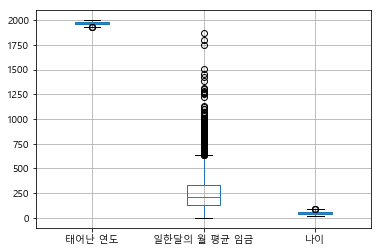

In [176]:
year_sal_age_df.boxplot()
plt.show()